In [1]:
%cd mmdetection

/mnt/nas2/users/eslim/workspace/comp/mmdetection


In [2]:

import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [3]:
from mmengine import ConfigDict
from mmengine.config import Config, DictAction


cfg = Config.fromfile('./work_dirs/resnet101/refine_v2/co_dino_5scale_r50_lsj_8xb2_1x_resnet101_refine.py')
cfg.model = ConfigDict(**cfg.tta_model, module=cfg.model)
cfg.test_dataloader.dataset.pipeline = cfg.tta_pipeline

In [4]:
from mmdet.apis import DetInferencer


# checkpoint = "./work_dirs/yolox/extra/epoch_290.pth"
# checkpoint = "./work_dirs/yolox/total/epoch_240.pth"

checkpoint = "./work_dirs/resnet101/refine_v2/iter_92000.pth"


# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(cfg, checkpoint, device)

# Use the detector to do inference
img = './demo/demo.jpg'
result = inferencer(img, out_dir='./output')


Loads checkpoint by local backend from path: ./work_dirs/resnet101/refine_v2/iter_92000.pth
09/10 08:53:27 - mmengine - INFO - 
rpn_conv.weight - torch.Size([256, 256, 3, 3]): 
NormalInit: mean=0, std=0.01, bias=0 
 
09/10 08:53:27 - mmengine - INFO - 
rpn_conv.bias - torch.Size([256]): 
NormalInit: mean=0, std=0.01, bias=0 
 
09/10 08:53:27 - mmengine - INFO - 
rpn_cls.weight - torch.Size([9, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
09/10 08:53:27 - mmengine - INFO - 
rpn_cls.bias - torch.Size([9]): 
NormalInit: mean=0, std=0.01, bias=0 
 
09/10 08:53:27 - mmengine - INFO - 
rpn_reg.weight - torch.Size([36, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
09/10 08:53:27 - mmengine - INFO - 
rpn_reg.bias - torch.Size([36]): 
NormalInit: mean=0, std=0.01, bias=0 
 
09/10 08:53:27 - mmengine - INFO - 
bbox_head.fc_cls.weight - torch.Size([9, 1024]): 
NormalInit: mean=0, std=0.01, bias=0 
 
09/10 08:53:27 - mmengine - INFO - 
bbox_head.fc_cls.bias - torch.Size([9]): 
Nor

/mnt/nas2/users/eslim/workspace/comp/mmdetection/mmdet/models/dense_heads/anchor_head.py:108: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '


09/10 08:53:30 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
09/10 08:53:30 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


Output()

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their 
associated APIs are an experimental feature and subject to change. Please do not use them for anything important 
until they are released as stable. (Triggered internally at  
/opt/conda/conda-bld/pytorch_1623448265233/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)

/opt/conda/lib/python3.7/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be 
removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This 
results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use 
torch.div(a, b, rounding_mode='floor'). (Triggered internally at  
/opt/conda/conda-bld/pytorch_1623448265233/work/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)

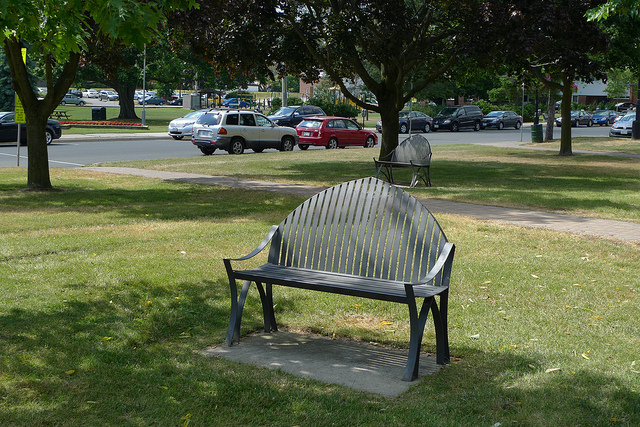

In [5]:
from PIL import Image
Image.open('./demo/demo.jpg')

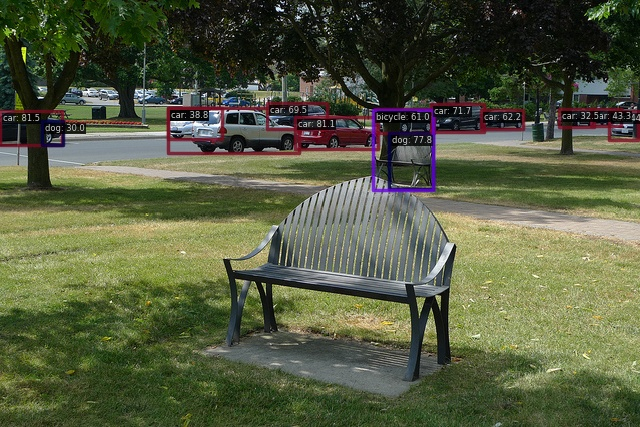

In [6]:
from PIL import Image
Image.open('./output/vis/demo.jpg')
# Show the output image


In [11]:
img = '../all_dataset/test/test_open_1100.png'
result = inferencer(img, out_dir='./output')

Output()

/opt/conda/lib/python3.7/site-packages/mmengine/visualization/visualizer.py:743: UserWarning: Warning: The bbox is 
out of bounds, the drawn bbox may not be in the image
  ' the drawn bbox may not be in the image', UserWarning)

/opt/conda/lib/python3.7/site-packages/mmengine/visualization/visualizer.py:814: UserWarning: Warning: The polygon 
is out of bounds, the drawn polygon may not be in the image
  ' the drawn polygon may not be in the image', UserWarning)

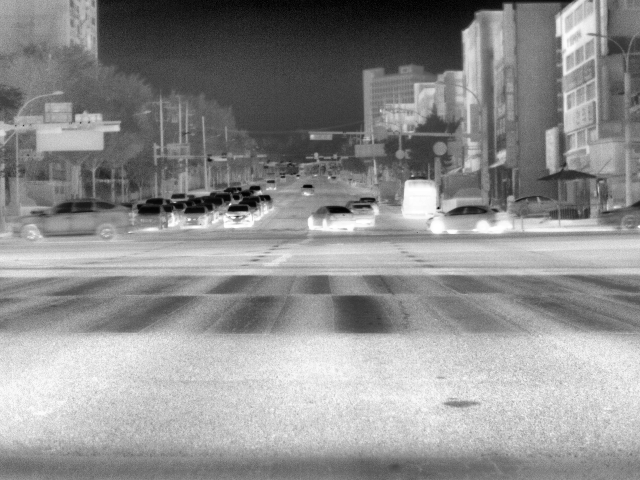

In [12]:
# min_x, min_y, max_x, max_y = result['predictions'][0]["bboxes"][0]
# min_x
from PIL import Image
Image.open(img)

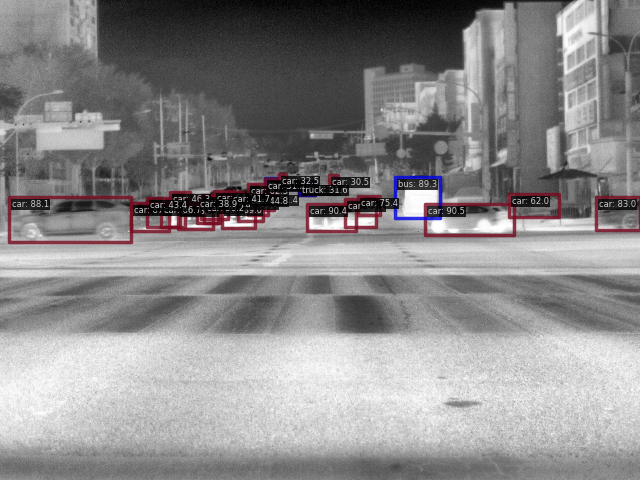

In [13]:
from PIL import Image
Image.open('./output/vis/'+img.split("/")[-1])

In [14]:
from natsort import natsorted

test_dir_prefix = "../all_dataset/test/"
images = os.listdir(test_dir_prefix)
sorted_images = natsorted(images)


In [15]:
import json
sub_results = []
total_idx=0
for image_dir in sorted_images:
    result = inferencer(os.path.join(test_dir_prefix,image_dir))
    obj_num = len(result['predictions'][0]["labels"])
    for idx in range(obj_num):
#         if result['predictions'][0]["scores"][idx] < 0.1:
#             continue
#         if result['predictions'][0]["labels"][idx] > 8:
#             print(result['predictions'][0]["labels"][idx])
        min_x, min_y, max_x, max_y = result['predictions'][0]["bboxes"][idx]
        ret = {
            "image_id" : str(image_dir.split(".")[0]),
            "category_id" : result['predictions'][0]["labels"][idx],
            "bbox":[
                min_x,
                min_y,
                max_x-min_x,
                max_y-min_y
            ],
            "score":result['predictions'][0]["scores"][idx],
        }
        sub_results.append(ret)
    total_idx+=1
    print(total_idx)
#     if total_idx>100:
#         break
with open("/home/eslim/workspace/comp/results/sub_results_cds101_total_refine_tta.txt", "w") as file:
    json.dump(sub_results, file, indent=4)



Output()

Output()

1


Output()

2


Output()

3


Output()

4


Output()

5


Output()

6


Output()

7


Output()

8


Output()

9


Output()

10


Output()

11


Output()

12


Output()

13


Output()

14


Output()

15


Output()

16


Output()

17


Output()

18


Output()

19


Output()

20


Output()

21


Output()

22


Output()

23


Output()

24


Output()

25


Output()

26


Output()

27


Output()

28


Output()

29


Output()

30


Output()

31


Output()

32


Output()

33


Output()

34


Output()

35


Output()

36


Output()

37


Output()

38


Output()

39


Output()

40


Output()

41


Output()

42


Output()

43


Output()

44


Output()

45


Output()

46


Output()

47


Output()

48


Output()

49


Output()

50


Output()

51


Output()

52


Output()

53


Output()

54


Output()

55


Output()

56


Output()

57


Output()

58


Output()

59


Output()

60


Output()

61


Output()

62


Output()

63


Output()

64


Output()

65


Output()

66


Output()

67


Output()

68


Output()

69


Output()

70


Output()

71


Output()

72


Output()

73


Output()

74


Output()

75


Output()

76


Output()

77


Output()

78


Output()

79


Output()

80


Output()

81


Output()

82


Output()

83


Output()

84


Output()

85


Output()

86


Output()

87


Output()

88


Output()

89


Output()

90


Output()

91


Output()

92


Output()

93


Output()

94


Output()

95


Output()

96


Output()

97


Output()

98


Output()

99


Output()

100


Output()

101


Output()

102


Output()

103


Output()

104


Output()

105


Output()

106


Output()

107


Output()

108


Output()

109


Output()

110


Output()

111


Output()

112


Output()

113


Output()

114


Output()

115


Output()

116


Output()

117


Output()

118


Output()

119


Output()

120


Output()

121


Output()

122


Output()

123


Output()

124


Output()

125


Output()

126


Output()

127


Output()

128


Output()

129


Output()

130


Output()

131


Output()

132


Output()

133


Output()

134


Output()

135


Output()

136


Output()

137


Output()

138


Output()

139


Output()

140


Output()

141


Output()

142


Output()

143


Output()

144


Output()

145


Output()

146


Output()

147


Output()

148


Output()

149


Output()

150


Output()

151


Output()

152


Output()

153


Output()

154


Output()

155


Output()

156


Output()

157


Output()

158


Output()

159


Output()

160


Output()

161


Output()

162


Output()

163


Output()

164


Output()

165


Output()

166


Output()

167


Output()

168


Output()

169


Output()

170


Output()

171


Output()

172


Output()

173


Output()

174


Output()

175


Output()

176


Output()

177


Output()

178


Output()

179


Output()

180


Output()

181


Output()

182


Output()

183


Output()

184


Output()

185


Output()

186


Output()

187


Output()

188


Output()

189


Output()

190


Output()

191


Output()

192


Output()

193


Output()

194


Output()

195


Output()

196


Output()

197


Output()

198


Output()

199


Output()

200


Output()

201


Output()

202


Output()

203


Output()

204


Output()

205


Output()

206


Output()

207


Output()

208


Output()

209


Output()

210


Output()

211


Output()

212


Output()

213


Output()

214


Output()

215


Output()

216


Output()

217


Output()

218


Output()

219


Output()

220


Output()

221


Output()

222


Output()

223


Output()

224


Output()

225


Output()

226


Output()

227


Output()

228


Output()

229


Output()

230


Output()

231


Output()

232


Output()

233


Output()

234


Output()

235


Output()

236


Output()

237


Output()

238


Output()

239


Output()

240


Output()

241


Output()

242


Output()

243


Output()

244


Output()

245


Output()

246


Output()

247


Output()

248


Output()

249


Output()

250


Output()

251


Output()

252


Output()

253


Output()

254


Output()

255


Output()

256


Output()

257


Output()

258


Output()

259


Output()

260


Output()

261


Output()

262


Output()

263


Output()

264


Output()

265


Output()

266


Output()

267


Output()

268


Output()

269


Output()

270


Output()

271


Output()

272


Output()

273


Output()

274


Output()

275


Output()

276


Output()

277


Output()

278


Output()

279


Output()

280


Output()

281


Output()

282


Output()

283


Output()

284


Output()

285


Output()

286


Output()

287


Output()

288


Output()

289


Output()

290


Output()

291


Output()

292


Output()

293


Output()

294


Output()

295


Output()

296


Output()

297


Output()

298


Output()

299


Output()

300


Output()

301


Output()

302


Output()

303


Output()

304


Output()

305


Output()

306


Output()

307


Output()

308


Output()

309


Output()

310


Output()

311


Output()

312


Output()

313


Output()

314


Output()

315


Output()

316


Output()

317


Output()

318


Output()

319


Output()

320


Output()

321


Output()

322


Output()

323


Output()

324


Output()

325


Output()

326


Output()

327


Output()

328


Output()

329


Output()

330


Output()

331


Output()

332


Output()

333


Output()

334


Output()

335


Output()

336


Output()

337


Output()

338


Output()

339


Output()

340


Output()

341


Output()

342


Output()

343


Output()

344


Output()

345


Output()

346


Output()

347


Output()

348


Output()

349


Output()

350


Output()

351


Output()

352


Output()

353


Output()

354


Output()

355


Output()

356


Output()

357


Output()

358


Output()

359


Output()

360


Output()

361


Output()

362


Output()

363


Output()

364


Output()

365


Output()

366


Output()

367


Output()

368


Output()

369


Output()

370


Output()

371


Output()

372


Output()

373


Output()

374


Output()

375


Output()

376


Output()

377


Output()

378


Output()

379


Output()

380


Output()

381


Output()

382


Output()

383


Output()

384


Output()

385


Output()

386


Output()

387


Output()

388


Output()

389


Output()

390


Output()

391


Output()

392


Output()

393


Output()

394


Output()

395


Output()

396


Output()

397


Output()

398


Output()

399


Output()

400


Output()

401


Output()

402


Output()

403


Output()

404


Output()

405


Output()

406


Output()

407


Output()

408


Output()

409


Output()

410


Output()

411


Output()

412


Output()

413


Output()

414


Output()

415


Output()

416


Output()

417


Output()

418


Output()

419


Output()

420


Output()

421


Output()

422


Output()

423


Output()

424


Output()

425


Output()

426


Output()

427


Output()

428


Output()

429


Output()

430


Output()

431


Output()

432


Output()

433


Output()

434


Output()

435


Output()

436


Output()

437


Output()

438


Output()

439


Output()

440


Output()

441


Output()

442


Output()

443


Output()

444


Output()

445


Output()

446


Output()

447


Output()

448


Output()

449


Output()

450


Output()

451


Output()

452


Output()

453


Output()

454


Output()

455


Output()

456


Output()

457


Output()

458


Output()

459


Output()

460


Output()

461


Output()

462


Output()

463


Output()

464


Output()

465


Output()

466


Output()

467


Output()

468


Output()

469


Output()

470


Output()

471


Output()

472


Output()

473


Output()

474


Output()

475


Output()

476


Output()

477


Output()

478


Output()

479


Output()

480


Output()

481


Output()

482


Output()

483


Output()

484


Output()

485


Output()

486


Output()

487


Output()

488


Output()

489


Output()

490


Output()

491


Output()

492


Output()

493


Output()

494


Output()

495


Output()

496


Output()

497


Output()

498


Output()

499


Output()

500


Output()

501


Output()

502


Output()

503


Output()

504


Output()

505


Output()

506


Output()

507


Output()

508


Output()

509


Output()

510


Output()

511


Output()

512


Output()

513


Output()

514


Output()

515


Output()

516


Output()

517


Output()

518


Output()

519


Output()

520


Output()

521


Output()

522


Output()

523


Output()

524


Output()

525


Output()

526


Output()

527


Output()

528


Output()

529


Output()

530


Output()

531


Output()

532


Output()

533


Output()

534


Output()

535


Output()

536


Output()

537


Output()

538


Output()

539


Output()

540


Output()

541


Output()

542


Output()

543


Output()

544


Output()

545


Output()

546


Output()

547


Output()

548


Output()

549


Output()

550


Output()

551


Output()

552


Output()

553


Output()

554


Output()

555


Output()

556


Output()

557


Output()

558


Output()

559


Output()

560


Output()

561


Output()

562


Output()

563


Output()

564


Output()

565


Output()

566


Output()

567


Output()

568


Output()

569


Output()

570


Output()

571


Output()

572


Output()

573


Output()

574


Output()

575


Output()

576


Output()

577


Output()

578


Output()

579


Output()

580


Output()

581


Output()

582


Output()

583


Output()

584


Output()

585


Output()

586


Output()

587


Output()

588


Output()

589


Output()

590


Output()

591


Output()

592


Output()

593


Output()

594


Output()

595


Output()

596


Output()

597


Output()

598


Output()

599


Output()

600


Output()

601


Output()

602


Output()

603


Output()

604


Output()

605


Output()

606


Output()

607


Output()

608


Output()

609


Output()

610


Output()

611


Output()

612


Output()

613


Output()

614


Output()

615


Output()

616


Output()

617


Output()

618


Output()

619


Output()

620


Output()

621


Output()

622


Output()

623


Output()

624


Output()

625


Output()

626


Output()

627


Output()

628


Output()

629


Output()

630


Output()

631


Output()

632


Output()

633


Output()

634


Output()

635


Output()

636


Output()

637


Output()

638


Output()

639


Output()

640


Output()

641


Output()

642


Output()

643


Output()

644


Output()

645


Output()

646


Output()

647


Output()

648


Output()

649


Output()

650


Output()

651


Output()

652


Output()

653


Output()

654


Output()

655


Output()

656


Output()

657


Output()

658


Output()

659


Output()

660


Output()

661


Output()

662


Output()

663


Output()

664


Output()

665


Output()

666


Output()

667


Output()

668


Output()

669


Output()

670


Output()

671


Output()

672


Output()

673


Output()

674


Output()

675


Output()

676


Output()

677


Output()

678


Output()

679


Output()

680


Output()

681


Output()

682


Output()

683


Output()

684


Output()

685


Output()

686


Output()

687


Output()

688


Output()

689


Output()

690


Output()

691


Output()

692


Output()

693


Output()

694


Output()

695


Output()

696


Output()

697


Output()

698


Output()

699


Output()

700


Output()

701


Output()

702


Output()

703


Output()

704


Output()

705


Output()

706


Output()

707


Output()

708


Output()

709


Output()

710


Output()

711


Output()

712


Output()

713


Output()

714


Output()

715


Output()

716


Output()

717


Output()

718


Output()

719


Output()

720


Output()

721


Output()

722


Output()

723


Output()

724


Output()

725


Output()

726


Output()

727


Output()

728


Output()

729


Output()

730


Output()

731


Output()

732


Output()

733


Output()

734


Output()

735


Output()

736


Output()

737


Output()

738


Output()

739


Output()

740


Output()

741


Output()

742


Output()

743


Output()

744


Output()

745


Output()

746


Output()

747


Output()

748


Output()

749


Output()

750


Output()

751


Output()

752


Output()

753


Output()

754


Output()

755


Output()

756


Output()

757


Output()

758


Output()

759


Output()

760


Output()

761


Output()

762


Output()

763


Output()

764


Output()

765


Output()

766


Output()

767


Output()

768


Output()

769


Output()

770


Output()

771


Output()

772


Output()

773


Output()

774


Output()

775


Output()

776


Output()

777


Output()

778


Output()

779


Output()

780


Output()

781


Output()

782


Output()

783


Output()

784


Output()

785


Output()

786


Output()

787


Output()

788


Output()

789


Output()

790


Output()

791


Output()

792


Output()

793


Output()

794


Output()

795


Output()

796


Output()

797


Output()

798


Output()

799


Output()

800


Output()

801


Output()

802


Output()

803


Output()

804


Output()

805


Output()

806


Output()

807


Output()

808


Output()

809


Output()

810


Output()

811


Output()

812


Output()

813


Output()

814


Output()

815


Output()

816


Output()

817


Output()

818


Output()

819


Output()

820


Output()

821


Output()

822


Output()

823


Output()

824


Output()

825


Output()

826


Output()

827


Output()

828


Output()

829


Output()

830


Output()

831


Output()

832


Output()

833


Output()

834


Output()

835


Output()

836


Output()

837


Output()

838


Output()

839


Output()

840


Output()

841


Output()

842


Output()

843


Output()

844


Output()

845


Output()

846


Output()

847


Output()

848


Output()

849


Output()

850


Output()

851


Output()

852


Output()

853


Output()

854


Output()

855


Output()

856


Output()

857


Output()

858


Output()

859


Output()

860


Output()

861


Output()

862


Output()

863


Output()

864


Output()

865


Output()

866


Output()

867


Output()

868


Output()

869


Output()

870


Output()

871


Output()

872


Output()

873


Output()

874


Output()

875


Output()

876


Output()

877


Output()

878


Output()

879


Output()

880


Output()

881


Output()

882


Output()

883


Output()

884


Output()

885


Output()

886


Output()

887


Output()

888


Output()

889


Output()

890


Output()

891


Output()

892


Output()

893


Output()

894


Output()

895


Output()

896


Output()

897


Output()

898


Output()

899


Output()

900


Output()

901


Output()

902


Output()

903


Output()

904


Output()

905


Output()

906


Output()

907


Output()

908


Output()

909


Output()

910


Output()

911


Output()

912


Output()

913


Output()

914


Output()

915


Output()

916


Output()

917


Output()

918


Output()

919


Output()

920


Output()

921


Output()

922


Output()

923


Output()

924


Output()

925


Output()

926


Output()

927


Output()

928


Output()

929


Output()

930


Output()

931


Output()

932


Output()

933


Output()

934


Output()

935


Output()

936


Output()

937


Output()

938


Output()

939


Output()

940


Output()

941


Output()

942


Output()

943


Output()

944


Output()

945


Output()

946


Output()

947


Output()

948


Output()

949


Output()

950


Output()

951


Output()

952


Output()

953


Output()

954


Output()

955


Output()

956


Output()

957


Output()

958


Output()

959


Output()

960


Output()

961


Output()

962


Output()

963


Output()

964


Output()

965


Output()

966


Output()

967


Output()

968


Output()

969


Output()

970


Output()

971


Output()

972


Output()

973


Output()

974


Output()

975


Output()

976


Output()

977


Output()

978


Output()

979


Output()

980


Output()

981


Output()

982


Output()

983


Output()

984


Output()

985


Output()

986


Output()

987


Output()

988


Output()

989


Output()

990


Output()

991


Output()

992


Output()

993


Output()

994


Output()

995


Output()

996


Output()

997


Output()

998


Output()

999


Output()

1000


Output()

1001


Output()

1002


Output()

1003


Output()

1004


Output()

1005


Output()

1006


Output()

1007


Output()

1008


Output()

1009


Output()

1010


Output()

1011


Output()

1012


Output()

1013


Output()

1014


Output()

1015


Output()

1016


Output()

1017


Output()

1018


Output()

1019


Output()

1020


Output()

1021


Output()

1022


Output()

1023


Output()

1024


Output()

1025


Output()

1026


Output()

1027


Output()

1028


Output()

1029


Output()

1030


Output()

1031


Output()

1032


Output()

1033


Output()

1034


Output()

1035


Output()

1036


Output()

1037


Output()

1038


Output()

1039


Output()

1040


Output()

1041


Output()

1042


Output()

1043


Output()

1044


Output()

1045


Output()

1046


Output()

1047


Output()

1048


Output()

1049


Output()

1050


Output()

1051


Output()

1052


Output()

1053


Output()

1054


Output()

1055


Output()

1056


Output()

1057


Output()

1058


Output()

1059


Output()

1060


Output()

1061


Output()

1062


Output()

1063


Output()

1064


Output()

1065


Output()

1066


Output()

1067


Output()

1068


Output()

1069


Output()

1070


Output()

1071


Output()

1072


Output()

1073


Output()

1074


Output()

1075


Output()

1076


Output()

1077


Output()

1078


Output()

1079


Output()

1080


Output()

1081


Output()

1082


Output()

1083


Output()

1084


Output()

1085


Output()

1086


Output()

1087


Output()

1088


Output()

1089


Output()

1090


Output()

1091


Output()

1092


Output()

1093


Output()

1094


Output()

1095


Output()

1096


Output()

1097


Output()

1098


Output()

1099


Output()

1100


Output()

1101


Output()

1102


Output()

1103


Output()

1104


Output()

1105


Output()

1106


Output()

1107


Output()

1108


Output()

1109


Output()

1110


Output()

1111


Output()

1112


Output()

1113


Output()

1114


Output()

1115


Output()

1116


Output()

1117


Output()

1118


Output()

1119


Output()

1120


Output()

1121


Output()

1122


Output()

1123


Output()

1124


Output()

1125


Output()

1126


Output()

1127


Output()

1128


Output()

1129


Output()

1130


Output()

1131


Output()

1132


Output()

1133


Output()

1134


Output()

1135


Output()

1136


Output()

1137


Output()

1138


Output()

1139


Output()

1140


Output()

1141


Output()

1142


Output()

1143


Output()

1144


Output()

1145


Output()

1146


Output()

1147


Output()

1148


Output()

1149


Output()

1150


Output()

1151


Output()

1152


Output()

1153


Output()

1154


Output()

1155


Output()

1156


Output()

1157


Output()

1158


Output()

1159


Output()

1160


Output()

1161


Output()

1162


Output()

1163


Output()

1164


Output()

1165


Output()

1166


Output()

1167


Output()

1168


Output()

1169


Output()

1170


Output()

1171


Output()

1172


Output()

1173


Output()

1174


Output()

1175


Output()

1176


Output()

1177


Output()

1178


Output()

1179


Output()

1180


Output()

1181


Output()

1182


Output()

1183


Output()

1184


Output()

1185


Output()

1186


Output()

1187


Output()

1188


Output()

1189


Output()

1190


Output()

1191


Output()

1192


Output()

1193


Output()

1194


Output()

1195


Output()

1196


Output()

1197


Output()

1198


Output()

1199


Output()

1200


Output()

1201


Output()

1202


Output()

1203


Output()

1204


Output()

1205


Output()

1206


Output()

1207


Output()

1208


Output()

1209


Output()

1210


Output()

1211


Output()

1212


Output()

1213


Output()

1214


Output()

1215


Output()

1216


Output()

1217


Output()

1218


Output()

1219


Output()

1220


Output()

1221


Output()

1222


Output()

1223


Output()

1224


Output()

1225


Output()

1226


Output()

1227


Output()

1228


Output()

1229


Output()

1230


Output()

1231


Output()

1232


Output()

1233


Output()

1234


Output()

1235


Output()

1236


Output()

1237


Output()

1238


Output()

1239


Output()

1240


Output()

1241


Output()

1242


Output()

1243


Output()

1244


Output()

1245


Output()

1246


Output()

1247


Output()

1248


Output()

1249


Output()

1250


Output()

1251


Output()

1252


Output()

1253


Output()

1254


Output()

1255


Output()

1256


Output()

1257


Output()

1258


Output()

1259


Output()

1260


Output()

1261


Output()

1262


Output()

1263


Output()

1264


Output()

1265


Output()

1266


Output()

1267


Output()

1268


Output()

1269


Output()

1270


Output()

1271


Output()

1272


Output()

1273


Output()

1274


Output()

1275


Output()

1276


Output()

1277


Output()

1278


Output()

1279


Output()

1280


Output()

1281


Output()

1282


Output()

1283


Output()

1284


Output()

1285


Output()

1286


Output()

1287


Output()

1288


Output()

1289


Output()

1290


Output()

1291


Output()

1292


Output()

1293


Output()

1294


Output()

1295


Output()

1296


Output()

1297


Output()

1298


Output()

1299


Output()

1300


Output()

1301


Output()

1302


Output()

1303


Output()

1304


Output()

1305


Output()

1306


Output()

1307


Output()

1308


Output()

1309


Output()

1310


Output()

1311


Output()

1312


Output()

1313


Output()

1314


Output()

1315


Output()

1316


Output()

1317


Output()

1318


Output()

1319


Output()

1320


Output()

1321


Output()

1322


Output()

1323


Output()

1324


Output()

1325


Output()

1326


Output()

1327


Output()

1328


Output()

1329


Output()

1330


Output()

1331


Output()

1332


Output()

1333


Output()

1334


Output()

1335


Output()

1336


Output()

1337


Output()

1338


Output()

1339


Output()

1340


Output()

1341


Output()

1342


Output()

1343


Output()

1344


Output()

1345


Output()

1346


Output()

1347


Output()

1348


Output()

1349


Output()

1350


Output()

1351


Output()

1352


Output()

1353


Output()

1354


Output()

1355


Output()

1356


Output()

1357


Output()

1358


Output()

1359


Output()

1360


Output()

1361


Output()

1362


Output()

1363


Output()

1364


Output()

1365


Output()

1366


Output()

1367


Output()

1368


Output()

1369


Output()

1370


Output()

1371


Output()

1372


Output()

1373


Output()

1374


Output()

1375


Output()

1376


Output()

1377


Output()

1378


Output()

1379


Output()

1380


Output()

1381


Output()

1382


Output()

1383


Output()

1384


Output()

1385


Output()

1386


Output()

1387


Output()

1388


Output()

1389


Output()

1390


Output()

1391


Output()

1392


Output()

1393


Output()

1394


Output()

1395


Output()

1396


Output()

1397


Output()

1398


Output()

1399


Output()

1400


Output()

1401


Output()

1402


Output()

1403


Output()

1404


Output()

1405


Output()

1406


Output()

1407


Output()

1408


Output()

1409


Output()

1410


Output()

1411


Output()

1412


Output()

1413


Output()

1414


Output()

1415


Output()

1416


Output()

1417


Output()

1418


Output()

1419


Output()

1420


Output()

1421


Output()

1422


Output()

1423


Output()

1424


Output()

1425


Output()

1426


Output()

1427


Output()

1428


Output()

1429


Output()

1430


Output()

1431


Output()

1432


Output()

1433


Output()

1434


Output()

1435


Output()

1436


Output()

1437


Output()

1438


Output()

1439


Output()

1440


Output()

1441


Output()

1442


Output()

1443


Output()

1444


Output()

1445


Output()

1446


Output()

1447


Output()

1448


Output()

1449


Output()

1450


Output()

1451


Output()

1452


Output()

1453


Output()

1454


Output()

1455


Output()

1456


Output()

1457


Output()

1458


Output()

1459


Output()

1460


Output()

1461


Output()

1462


Output()

1463


Output()

1464


Output()

1465


Output()

1466


Output()

1467


Output()

1468


Output()

1469


Output()

1470


Output()

1471


Output()

1472


Output()

1473


Output()

1474


Output()

1475


Output()

1476


Output()

1477


Output()

1478


Output()

1479


Output()

1480


Output()

1481


Output()

1482


Output()

1483


Output()

1484


Output()

1485


Output()

1486


Output()

1487


Output()

1488


Output()

1489


Output()

1490


Output()

1491


Output()

1492


Output()

1493


Output()

1494


Output()

1495


Output()

1496


Output()

1497


Output()

1498


Output()

1499


Output()

1500


Output()

1501


Output()

1502


Output()

1503


Output()

1504


Output()

1505


Output()

1506


Output()

1507


Output()

1508


Output()

1509


Output()

1510


Output()

1511


Output()

1512


Output()

1513


Output()

1514


Output()

1515


Output()

1516


Output()

1517


Output()

1518


Output()

1519


Output()

1520


Output()

1521


Output()

1522


Output()

1523


Output()

1524


Output()

1525


Output()

1526


Output()

1527


Output()

1528


Output()

1529


Output()

1530


Output()

1531


Output()

1532


Output()

1533


Output()

1534


Output()

1535


Output()

1536


Output()

1537


Output()

1538


Output()

1539


Output()

1540


Output()

1541


Output()

1542


Output()

1543


Output()

1544


Output()

1545


Output()

1546


Output()

1547


Output()

1548


Output()

1549


Output()

1550


Output()

1551


Output()

1552


Output()

1553


Output()

1554


Output()

1555


Output()

1556


Output()

1557


Output()

1558


Output()

1559


Output()

1560


Output()

1561


Output()

1562


Output()

1563


Output()

1564


Output()

1565


Output()

1566


Output()

1567


Output()

1568


Output()

1569


Output()

1570


Output()

1571


Output()

1572


Output()

1573


Output()

1574


Output()

1575


Output()

1576


Output()

1577


Output()

1578


Output()

1579


Output()

1580


Output()

1581


Output()

1582


Output()

1583


Output()

1584


Output()

1585


Output()

1586


Output()

1587


Output()

1588


Output()

1589


Output()

1590


Output()

1591


Output()

1592


Output()

1593


Output()

1594


Output()

1595


Output()

1596


Output()

1597


Output()

1598


Output()

1599


Output()

1600


Output()

1601


Output()

1602


Output()

1603


Output()

1604


Output()

1605


Output()

1606


Output()

1607


Output()

1608


Output()

1609


Output()

1610


Output()

1611


Output()

1612


Output()

1613


Output()

1614


Output()

1615


Output()

1616


Output()

1617


Output()

1618


Output()

1619


Output()

1620


Output()

1621


Output()

1622


Output()

1623


Output()

1624


Output()

1625


Output()

1626


Output()

1627


Output()

1628


Output()

1629


Output()

1630


Output()

1631


Output()

1632


Output()

1633


Output()

1634


Output()

1635


1636


In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="unauthorized")
# project = rf.workspace("nii").project("pedestrian-cvc-14")
# version = project.version(1)
# dataset = version.download("coco-mmdetection")
                

